# K najbližih komšija

### Uvoz neophodnih biblioteka i učitavanje podataka

In [1]:
from testbench import Testbench

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
Testbench.author('Petar Petrović')

⚠️ Greška pri kontaktiranju servera za praćenje napretka.


U narednom segmentu se podaci i labele učitavaju iz fajla data_after_pca.csv, koji predstavlja podatke nad kojima ste prethodno radili analizu glavnih komponenti, i dele u trening set i test set. X_train i X_test predstavljaju podatke dok su y_train i y_test odgovarajuće labele datih podataka. 

In [3]:
df = pd.read_csv("datasets/kNN/data_after_pca.csv")
data = []

data.append(df["PC1"])
data.append(df["PC2"])
data = np.array(data)
data = np.transpose(data)

true_labels = np.array(df["NObeyesdad"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, true_labels, test_size = 0.20)

### Klasifikacija

Sledećih nekoliko ćelija predstavlja implementaciju metoda k-nearest neighbours kao i određivanje tačnosti izvršenog predviđanja klasa. U ovom segmentu je neophodno dopuniti i ispraviti naznačene delove koda.

In [9]:
def kNN(X_test: np.ndarray, X_train: np.ndarray, Y_train: np.ndarray) -> np.ndarray:
    
    #odabrati vrednost k tako da dati algoritam daje što bolji rezultat u zadatom slučaju
    k = 15 
    
    predictions = []
   
    for test_point in X_test:
        min_dist = []
        
        for i, point in enumerate(X_train):
            #za svaku vrednost iz seta za treniranje izračunati Euklidsku distancu od vrednosti iz test seta
            # i beležiti u nizu min_dist
            #uneti kod ovde
            
            d1 = (point[0] - test_point[0]) ** 2
            d2 = (point[0] - test_point[0]) ** 2
            dist = np.sqrt(d1 + d2)
            
            min_dist.append((i, dist))
                
        # sortiranje Euklidskih udaljenosti u nerastućem poretku
        min_dist.sort(key=lambda x: x[1])

        #izvući k vrednosti iz min_dist sa najmanjom distancom i njihove odgovarajuće indekse
        #uneti kod ovde
        neighbours = min_dist[:k]
        idx = []
        for i in neighbours:
            idx.append(i[0])
        #odrediti koja labela datih k vrednosti se najčešće pojavljuje
        #uneti kod ovde 
            
            
        output = Y_train[idx]
        values, counts = np.unique(output, return_counts = True)
        
        predicted_label = values[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

Testbench(kNN)

⚠️ Funkcija 'kNN' uspešno prolazi 79% testova.
⚠️ Greška pri kontaktiranju servera za praćenje napretka.


In [10]:
predictions = kNN(X_test, X_train, y_train)

In [11]:
def accuracy(pred , y_test):
    #prepraviti kod tako da računa tačnost klasifikacije kao odnos tačno određenih klasa i ukupnog broja primera

    count = 0
    
    for i in range(len(pred)):
        if pred[i] == y_test[i]:
            count += 1
            
    acc = count * 100 / len(pred)
            
    return acc

In [12]:
#pozivanje funkcije za računanje tačnosti i štampanje vrednosti
print(accuracy(predictions, y_test))

77.54137115839244


### Vizuelizacija rezultata klasifikacije

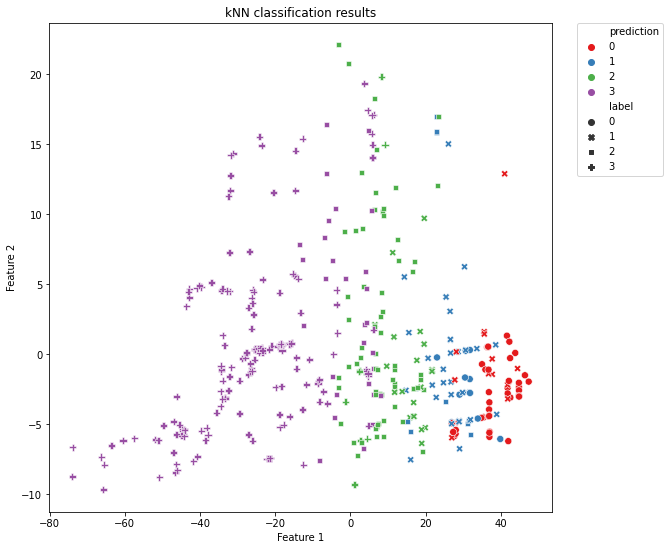

In [13]:
pcadf_train = pd.DataFrame(X_train, columns=["component_1", "component_2"])
pcadf_train["label"] = y_train
plt.figure(figsize=(9, 9))

pcadf = pd.DataFrame(X_test, columns=["component_1", "component_2"])
pcadf["prediction"] = predictions
pcadf["label"] = y_test

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf,
    hue="prediction",
    style="label",
    palette="Set1",
    legend="auto"
)
scat.set_title("kNN classification results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()